In [ ]:
from IPython.display import display, Markdown, Latex
import urllib

# Data source:
# https://archive.ics.uci.edu/ml/datasets/Adult

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
# Arquivo texto, delimitado por vírgulas, sem cabeçalho

data_raw=[]

for line in urllib.request.urlopen(url):
    # from bytes-like object to string
    lined = line.decode()
    # separa cada linha em campos (separados por vírgula)
    field_lst = str(lined).split(', ')
    
    # inclui no data frame se o número de atributos for o esperado
    if len(field_lst)==15:
        data_raw.append(field_lst[0:15])
    else:
        print('skipped data (error? blank line?):', line)
        
# cria dataframe pandas com dados

import pandas as pd
df = pd.DataFrame(data_raw)
df.shape

df.columns = ['age', 'type_employer', 'fnlwgt', 'education', 
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country","income"]

In [38]:
# ajusta os tipos das colunas numéricas

def str_to_int(c):
    if isinstance(c, int):
        return c
    else:
        try:
            return int(c)
        except:
            return None
  

df.age = df.age.apply(str_to_int)
df.fnlwgt = df.fnlwgt.apply(str_to_int)
df.education_num = df.education_num.apply(str_to_int)
df.capital_gain = df.capital_gain.apply(str_to_int)
df.capital_loss = df.capital_loss.apply(str_to_int)
df.hr_per_week = df.hr_per_week.apply(str_to_int)

The rate of white people with high income is:     21.86 %.
The rate of black people with high income is:    1.19 %.


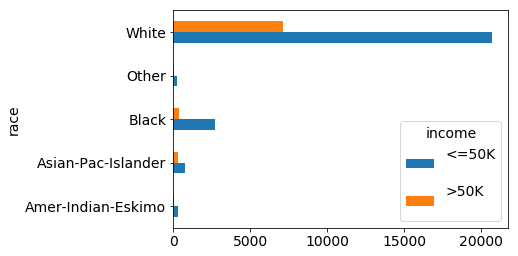

In [39]:
# Quão discrepante é a diferença entre o que negros e brancos ganham? 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

df_race_income = df.groupby(['race', 'income']).size()
df_race_income = df_race_income.unstack('income').fillna(0)
df_race_income.plot(kind='barh', stacked=False)


grand_total = np.sum(df_race_income.sum())
df_percent_race_income = 100.* df_sex_income / grand_total
df_percent_race_income

df_high_income = df_percent_race_income['>50K\n']
print('The rate of white people with high income is:    ', '{:5.2f}'.format(df_high_income['White']), '%.')
print('The rate of black people with high income is:  ', '{:5.2f}'.format(df_high_income['Black']), '%.')